<a href="https://colab.research.google.com/github/sjrk1436/Deep_Learning/blob/main/Deep_Learning_model_on_multi_class_classification_on_the_Fashion_MNIST_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Deep Learning model on multi-class classification

In [49]:
# importing libraries

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
# importing dataset

from tensorflow.keras.datasets import fashion_mnist

In [51]:
# separating train and test datasets

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [52]:
train_data[0], train_labels[0]

(array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
           0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
           1,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
           0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
           0,   3],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
           0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
          10

In [53]:
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [54]:
train_data[0].shape, train_labels[0].shape

((28, 28), ())

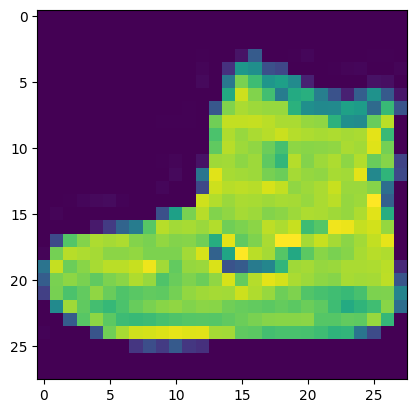

In [55]:
# plotting image

plt.imshow(train_data[0])
plt.show()

In [56]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
len(class_names)

10

Text(0.5, 1.0, 'Dress')

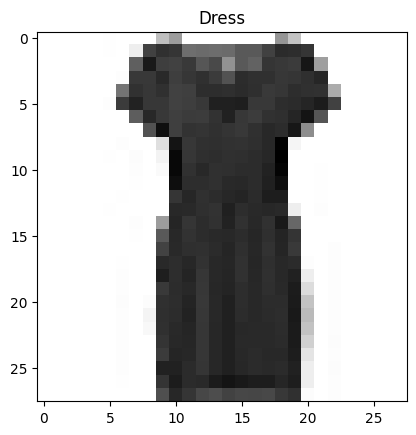

In [57]:
# Plot an example image and its label

index = 20
plt.imshow(train_data[index], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index]])

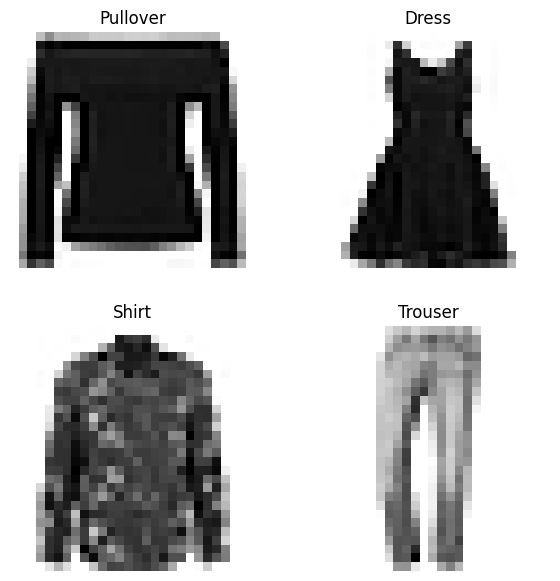

In [58]:
# Plot multiple random images of fashion MNIST

import random

plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  ax.axis('off')

plt.show()


In [59]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

In [60]:
# Divide train and test images by the maximum value (normalize it)
train_data = train_data / 255.0
test_data = test_data / 255.0

# Check the min and max values of the training data
train_data.min(), train_data.max()

(0.0, 1.0)

In [61]:
## Modelling

# Set random seed
tf.random.set_seed(42)

# Create the model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model (to the normalized data)
norm_history = model_1.fit(train_data,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.3204 - accuracy: 0.5036 - val_loss: 1.0509 - val_accuracy: 0.5903
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9597 - accuracy: 0.6354 - val_loss: 0.9139 - val_accuracy: 0.6555
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7621 - accuracy: 0.7326 - val_loss: 0.7273 - val_accuracy: 0.7318
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6527 - accuracy: 0.7639 - val_loss: 0.6582 - val_accuracy: 0.7564
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6154 - accuracy: 0.7743 - val_loss: 0.6466 - val_accuracy: 0.7663
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5933 - accuracy: 0.7801 - val_loss: 0.6461 - val_accuracy: 0.7568
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5818 - accuracy: 0.7838 - val_loss: 0.6187 - val_accuracy:

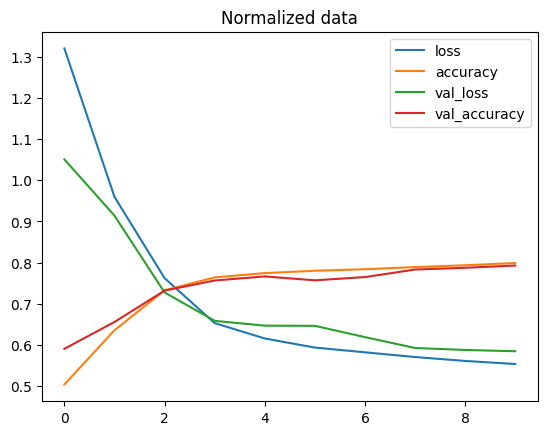

In [62]:
# Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized data");

In [63]:
## improving the model by adjusting Learning rate

# Set random seed
tf.random.set_seed(42)

# Create the model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # ideal learning rate (same as default)
                 metrics=["accuracy"])

# Fit the model
history = model_2.fit(train_data,
                       train_labels,
                       epochs=20,
                       validation_data=(test_data, test_labels))

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.1478 - accuracy: 0.5361 - val_loss: 0.8509 - val_accuracy: 0.7028
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7128 - accuracy: 0.7474 - val_loss: 0.6767 - val_accuracy: 0.7612
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6385 - accuracy: 0.7658 - val_loss: 0.6543 - val_accuracy: 0.7511
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6079 - accuracy: 0.7829 - val_loss: 0.6169 - val_accuracy: 0.7915
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5808 - accuracy: 0.7992 - val_loss: 0.6034 - val_accuracy: 0.7977
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5682 - accuracy: 0.8031 - val_loss: 0.6108 - val_accuracy: 0.7940
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5623 - accuracy: 0.8060 - val_loss: 0.6215 - val_accuracy:

In [64]:
# Make predictions with the most recent model
y_probs = model_2.predict(test_data) # "probs" is short for probabilities

# View the first 5 predictions
y_probs[:5]

313/313 [==============================] - 0s 1ms/step


array([[3.13501419e-10, 1.51542190e-13, 1.23535893e-13, 2.34914288e-09,
        7.67649111e-10, 5.14685988e-01, 4.64418859e-09, 9.14462879e-02,
        1.99815258e-04, 3.93667936e-01],
       [3.03870620e-04, 2.20139918e-05, 9.39442456e-01, 1.42872041e-05,
        5.69265615e-03, 2.47595887e-24, 5.45247383e-02, 0.00000000e+00,
        1.94296952e-08, 0.00000000e+00],
       [2.18786673e-11, 9.99916375e-01, 1.49312527e-08, 6.93573602e-05,
        1.41146475e-05, 5.42805176e-11, 1.05664122e-09, 1.21099616e-10,
        1.36486647e-11, 3.57571205e-19],
       [4.62021480e-12, 9.99947011e-01, 2.03347575e-10, 5.23983435e-05,
        3.42410942e-07, 5.39638445e-10, 4.27969916e-11, 1.27020144e-07,
        2.81946927e-12, 3.37752905e-15],
       [1.78979933e-01, 2.75224098e-04, 2.05280468e-01, 4.91314791e-02,
        2.85570435e-02, 1.86429041e-08, 5.35938621e-01, 4.90787248e-16,
        1.83726661e-03, 3.99408051e-22]], dtype=float32)

In [65]:
# See the predicted class number and label for the first example
y_probs[0].argmax(), class_names[y_probs[0].argmax()]

(5, 'Sandal')

In [66]:
# Convert all of the predictions from probabilities to labels
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([5, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [67]:
# Check out the non-prettified confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[809,   0,   9,  86,   3,   0,  81,   0,  12,   0],
       [  0, 925,  11,  48,  13,   0,   3,   0,   0,   0],
       [ 15,   2, 624,  24, 168,   0, 163,   0,   4,   0],
       [ 55,   8,  21, 844,  29,   4,  35,   0,   4,   0],
       [  2,   0, 100,  37, 746,   0, 108,   0,   7,   0],
       [  1,   0,   0,   4,   0, 892,   0,  47,  20,  36],
       [241,   1,  86,  63, 108,   0, 492,   0,   9,   0],
       [  0,   0,   0,   0,   0,  52,   0, 917,   0,  31],
       [  9,   1,   2,   7,   6,  15,  51,   4, 905,   0],
       [  0,   0,   0,   0,   0,  46,   0,  48,   2, 904]])

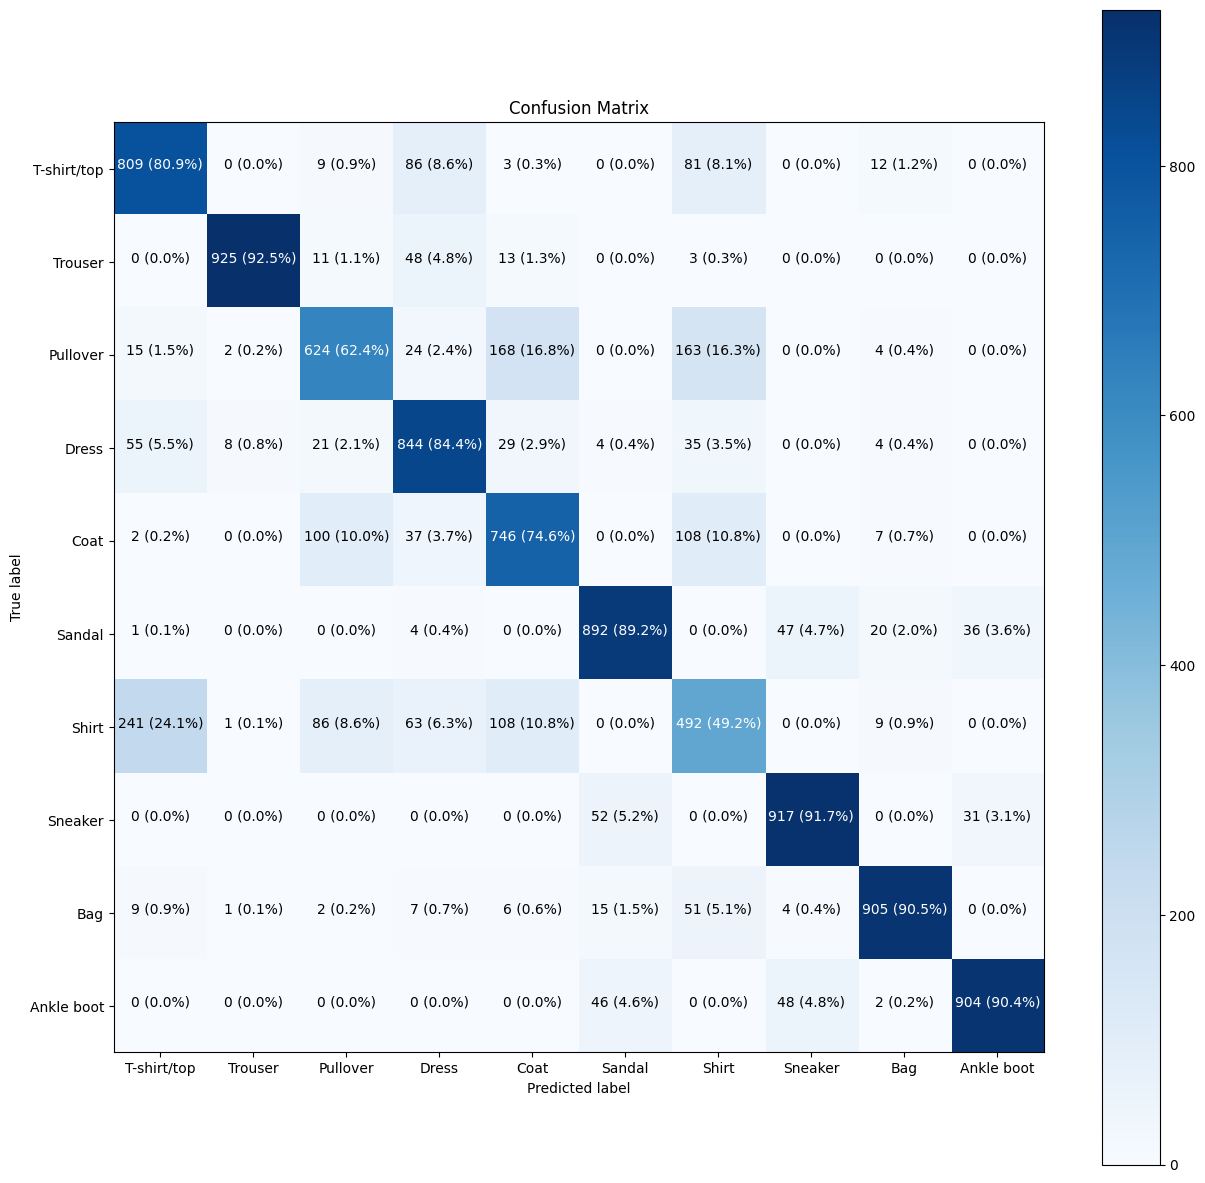

In [68]:
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):

  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

In [69]:
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):

  # Setup random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red

1/1 [==============================] - 0s 51ms/step


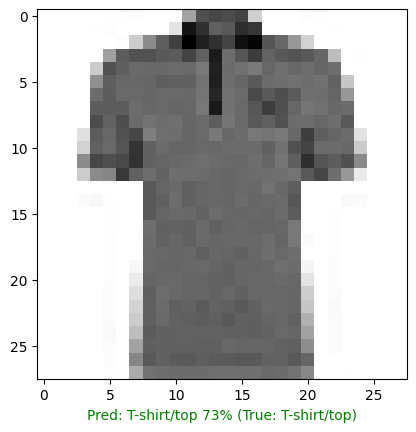

In [71]:
# Check out a random image as well as its prediction
plot_random_image(model=model_2,
                  images=test_data,
                  true_labels=test_labels,
                  classes=class_names)